In [10]:
import pandas as pd

path = "C:\\Users\\Igneus\\Dropbox\\Projects\\billups_test\\"

df = pd.read_csv(path+'data\\'+'data.csv')

df.head()

,lib_name,cust_city,gender,education,occupation,age,age_groups,categories,price,price_groups,pages,page_groups,past_due
0,Multnomah County Library Woodstock,Portland,Female,Graduate Degree,Tech,60.0,Seniors,Unknown,416.99,High,752,Long,0
1,Multnomah County Library,Portland,Male,Graduate Degree,Education & Health,62.0,Seniors,Advertising,217.00,Medium,790,Long,1
2,Multnomah County Library Kenton,Portland,Male,Graduate Degree,Education & Health,41.0,Mid-Career Consumers,Science,414.50,High,561,Medium,0
3,Multnomah County Library North Portland,Portland,Male,High School,Business & Finance,49.0,Experienced Professionals,Conservation Of Natural Resources,149.00,Low,530,Short,0
4,Multnomah County Library,Portland,Female,College,Tech,58.0,Seniors,Agricultural Education,432.50,High,684,Medium,0


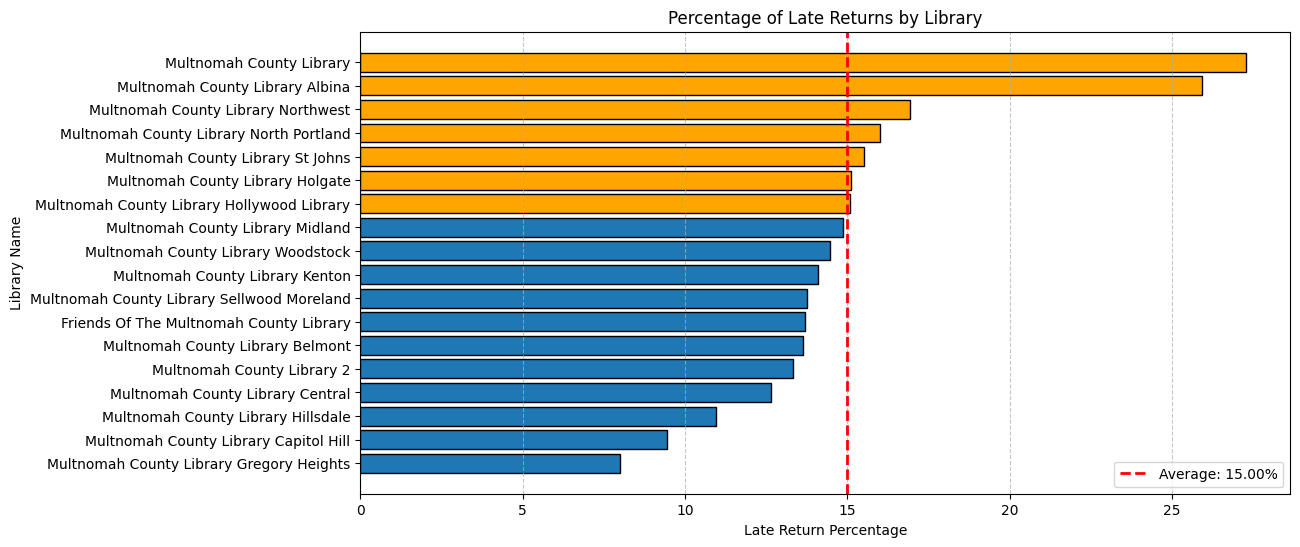

In [20]:
import matplotlib.pyplot as plt

# Ensure 'past_due' is numeric
df['past_due'] = pd.to_numeric(df['past_due'], errors='coerce')

# Calculate percentage of late returns per library name
late_return_per_lib = df.groupby('lib_name')['past_due'].mean() * 100

# Convert to DataFrame and sort by percentage
late_return_per_lib = late_return_per_lib.sort_values(ascending=False).reset_index()

# Calculate the overall average late return percentage
average_late_return = df['past_due'].mean() * 100

# Get the default blue color from Matplotlib
default_blue = plt.rcParams["axes.prop_cycle"].by_key()["color"][0]

# Define bar colors: blue for below average, orange for above average
bar_colors = [default_blue if value <= average_late_return else 'orange' for value in late_return_per_lib['past_due']]

# Create the bar chart with differentiated colors
plt.figure(figsize=(12, 6))
bars = plt.barh(late_return_per_lib['lib_name'], late_return_per_lib['past_due'], color=bar_colors, edgecolor='black')

# Add vertical red line for average
plt.axvline(x=average_late_return, color='red', linestyle='--', linewidth=2, label=f'Average: {average_late_return:.2f}%')

# Labels and title
plt.xlabel('Late Return Percentage')
plt.ylabel('Library Name')
plt.title('Percentage of Late Returns by Library')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend()

# Save and show the updated chart
plt.savefig(path+'images\\'+'late_returns_per_library.png', dpi=300, bbox_inches='tight')
plt.show()

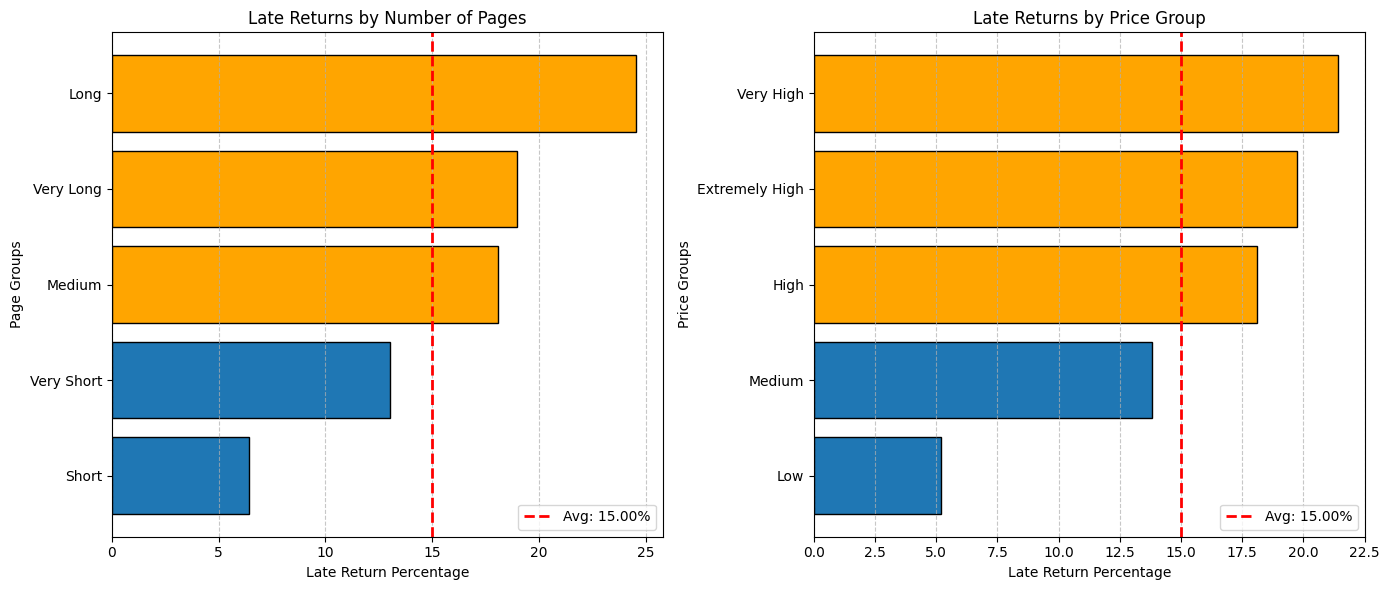

In [18]:
# Calculate percentage of late returns per page_groups and price_groups
late_return_per_pages = df.groupby('page_groups')['past_due'].mean() * 100
late_return_per_price = df.groupby('price_groups')['past_due'].mean() * 100

# Convert to DataFrame and sort by percentage
late_return_per_pages = late_return_per_pages.sort_values(ascending=False).reset_index()
late_return_per_price = late_return_per_price.sort_values(ascending=False).reset_index()

# Calculate the overall average late return percentage
average_late_return = df['past_due'].mean() * 100

# Get the default blue color from Matplotlib
default_blue = plt.rcParams["axes.prop_cycle"].by_key()["color"][0]

# Define bar colors for page groups: default blue for below average, orange for above average
bar_colors_pages = [default_blue if value <= average_late_return else 'orange' for value in late_return_per_pages['past_due']]

# Define bar colors for price groups: default blue for below average, orange for above average
bar_colors_price = [default_blue if value <= average_late_return else 'orange' for value in late_return_per_price['past_due']]

# Create a figure with two subplots (side-by-side with separate Y-axes)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot late returns by number of pages on the first subplot
axes[0].barh(late_return_per_pages['page_groups'], late_return_per_pages['past_due'], color=bar_colors_pages, edgecolor='black')
axes[0].axvline(x=average_late_return, color='red', linestyle='--', linewidth=2, label=f'Avg: {average_late_return:.2f}%')
axes[0].set_xlabel('Late Return Percentage')
axes[0].set_ylabel('Page Groups')
axes[0].set_title('Late Returns by Number of Pages')
axes[0].invert_yaxis()  # Highest percentage on top
axes[0].grid(axis='x', linestyle='--', alpha=0.7)
axes[0].legend()

# Plot late returns by price group on the second subplot with its own y-axis
axes[1].barh(late_return_per_price['price_groups'], late_return_per_price['past_due'], color=bar_colors_price, edgecolor='black')
axes[1].axvline(x=average_late_return, color='red', linestyle='--', linewidth=2, label=f'Avg: {average_late_return:.2f}%')
axes[1].set_xlabel('Late Return Percentage')
axes[1].set_ylabel('Price Groups')
axes[1].set_title('Late Returns by Price Group')
axes[1].invert_yaxis()  # Highest percentage on top
axes[1].grid(axis='x', linestyle='--', alpha=0.7)
axes[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Save and show the updated chart
plt.savefig(path+'images\\'+'late_returns_per_pages_and_prices.png')
plt.show()

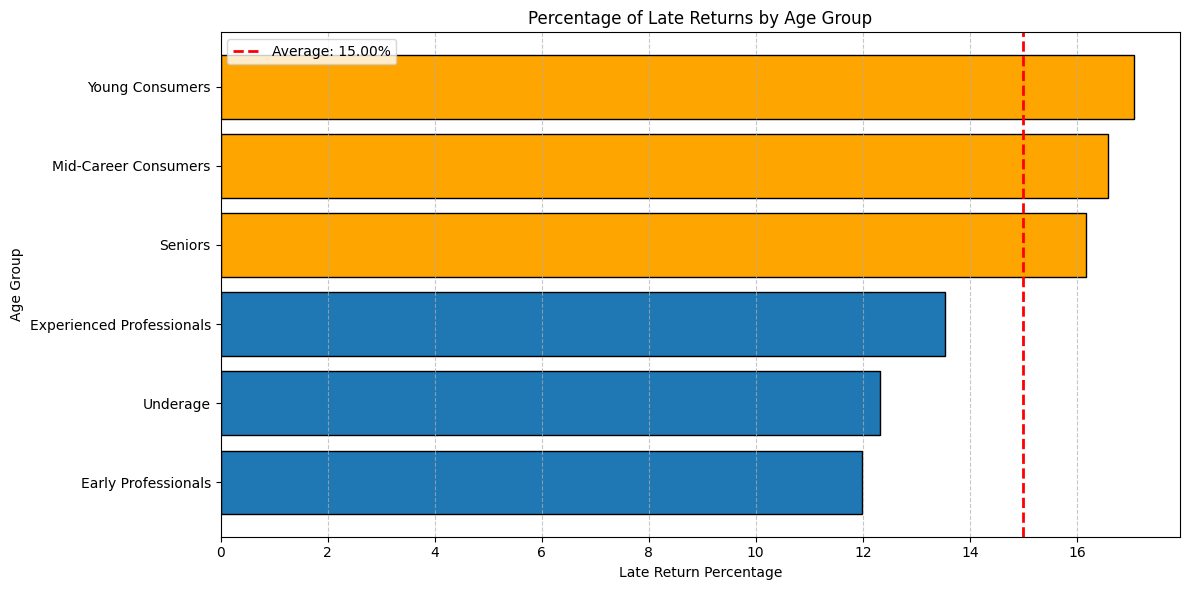

In [19]:
# Calculate percentage of late returns per age_groups
late_return_per_age = df.groupby('age_groups')['past_due'].mean() * 100

# Convert to DataFrame and sort by percentage
late_return_per_age = late_return_per_age.sort_values(ascending=False).reset_index()

# Calculate the overall average late return percentage
average_late_return = df['past_due'].mean() * 100

# Get the default blue color from Matplotlib
default_blue = plt.rcParams["axes.prop_cycle"].by_key()["color"][0]

# Define bar colors: default blue for below average, orange for above average
bar_colors_age = [default_blue if value <= average_late_return else 'orange' for value in late_return_per_age['past_due']]

# Create a figure with one subplot for age groups
fig, ax = plt.subplots(figsize=(12, 6))

# Plot late returns by age groups
ax.barh(late_return_per_age['age_groups'], late_return_per_age['past_due'], color=bar_colors_age, edgecolor='black')
ax.axvline(x=average_late_return, color='red', linestyle='--', linewidth=2, label=f'Average: {average_late_return:.2f}%')
ax.set_xlabel('Late Return Percentage')
ax.set_ylabel('Age Group')
ax.set_title('Percentage of Late Returns by Age Group')
ax.invert_yaxis()  # Highest percentage on top
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the updated chart
plt.savefig(path+'images\\'+'late_returns_per_age.png')
plt.show()

In [26]:
df = pd.read_csv(path+'data\\'+'df.csv')

# Ensure the date columns exist and are in datetime format
df['chk_date_checkout'] = pd.to_datetime(df['chk_date_checkout'], errors='coerce')
df['chk_date_returned'] = pd.to_datetime(df['chk_date_returned'], errors='coerce')

# Define a function to check for wrong entries
def is_wrong_entry(checkout, returned):
    return (
        pd.isna(checkout) or pd.isna(returned) or  # Missing values
        checkout.year < 1900 or returned.year < 1900 or  # Unrealistically old dates
        checkout > returned or  # Negative return period
        returned > pd.Timestamp.today()  # Future dates
    )

# Apply the function to identify wrong entries
df['wrong_entry'] = df.apply(lambda row: is_wrong_entry(row['chk_date_checkout'], row['chk_date_returned']), axis=1)

# Calculate percentage of wrong entries per library
wrong_entry_percent = df.groupby('lib_name')['wrong_entry'].mean() * 100

# Convert results to DataFrame
wrong_entry_df = wrong_entry_percent.reset_index()
wrong_entry_df.columns = ['Library Name', 'Percent of Wrong or Missing Entries']

# Display the table
from tabulate import tabulate
print(tabulate(wrong_entry_df, headers='keys', tablefmt='pretty'))

+----+--------------------------------------------+-------------------------------------+
|    |                Library Name                | Percent of Wrong or Missing Entries |
+----+--------------------------------------------+-------------------------------------+
| 0  |  Friends Of The Multnomah County Library   |         25.961538461538463          |
| 1  |          Multnomah County Library          |         26.851851851851855          |
| 2  |      Multnomah County Library Albina       |         28.799999999999997          |
| 3  |      Multnomah County Library Belmont      |         20.952380952380953          |
| 4  |   Multnomah County Library Capitol Hill    |          20.5607476635514           |
| 5  |      Multnomah County Library Central      |         24.107142857142858          |
| 6  |  Multnomah County Library Gregory Heights  |          29.72972972972973          |
| 7  |     Multnomah County Library Hillsdale     |          25.49019607843137          |
| 8  |    

In [27]:
wrong_entry_df.to_csv(path+'data\\'+'wrong_entries.csv')